# Kaggle API setup

In [3]:
!pip install kaggle

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [19]:
!pip install pandoc

     |████████████████████████████████| 49 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 4.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [4]:
!pwd

/root/shared/Courses/AML526/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


In [5]:
!mkdir ~/.kaggle
!cp /root/shared/Downloads/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  


## Downloading the files via Kaggle API

In [4]:
DATA_DIR = "/root/shared/Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

mkdir: cannot create directory ‘/root/shared/Data/home-credit-default-risk’: File exists


In [8]:
!ls -l $DATA_DIR

total 3326068
-rwxrwxrwx 1 root root     37383 Dec 11  2019 HomeCredit_columns_description.csv
-rwxrwxrwx 1 root root 392703158 Dec 11  2019 POS_CASH_balance.csv
-rwxrwxrwx 1 root root  26567651 Dec 11  2019 application_test.csv
-rwxrwxrwx 1 root root 166133370 Dec 11  2019 application_train.csv
-rwxrwxrwx 1 root root 170016717 Dec 11  2019 bureau.csv
-rwxrwxrwx 1 root root 375592889 Dec 11  2019 bureau_balance.csv
-rwxrwxrwx 1 root root 424582605 Dec 11  2019 credit_card_balance.csv
-rw-r--r-- 1 root root 721616255 Nov 13 03:36 home-credit-default-risk.zip
-rwxrwxrwx 1 root root 723118349 Dec 11  2019 installments_payments.csv
-rwxrwxrwx 1 root root 404973293 Dec 11  2019 previous_application.csv
-rwxrwxrwx 1 root root    536202 Dec 11  2019 sample_submission.csv


In [10]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR --force

100%|███████████████████████████████████████▉| 688M/688M [05:34<00:00, 1.21MB/s]
100%|████████████████████████████████████████| 688M/688M [05:34<00:00, 2.15MB/s]


# Imports

In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from scipy import stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Loads

## Application_Train data load

In [5]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

## Application_Test data load

In [7]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Other Datasets load

In [8]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 45.9 s, sys: 7.47 s, total: 53.4 s
Wall time: 1min 30s


# EDA

## Missing data for application train

In [9]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199


## Missing data for application test

In [10]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
COMMONAREA_MEDI,68.72,33495
NONLIVINGAPARTMENTS_AVG,68.41,33347
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780


## Distribution of the target column 

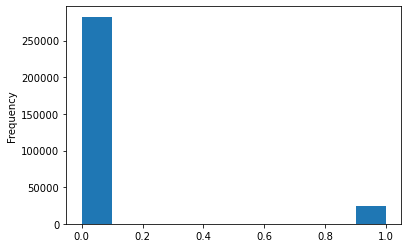

In [23]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();

## Correlation with  the target column 

In [24]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [12]:
app_train=datasets["application_train"]
app_test=datasets["application_test"]

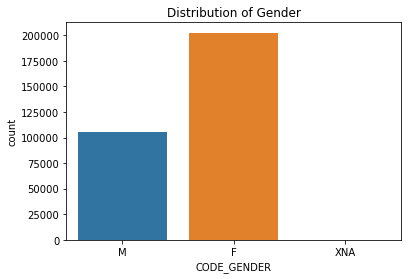

In [26]:
sns.countplot(data = app_train, x ='CODE_GENDER')
plt.title('Distribution of Gender')
plt.show()

It looks like we have more female Applicants when compared to male

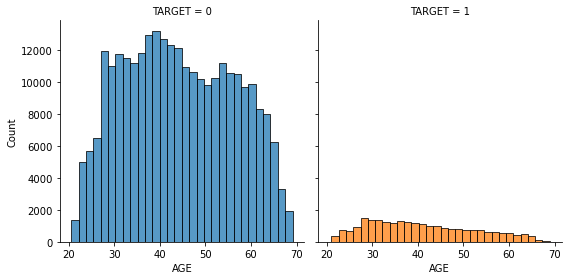

In [29]:
app_train['AGE'] = app_train['DAYS_BIRTH']/-365
fig = sns.FacetGrid(app_train, col='TARGET', hue='TARGET', height=4)
fig.map(sns.histplot, 'AGE', bins=30, kde=False)
plt.show()

It can be observed that most of the defaulters are approximately 27-40 yrs old.

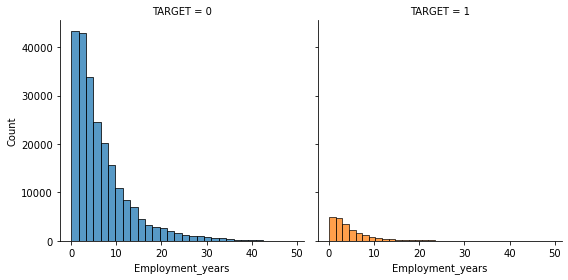

In [32]:
# replace the incorrect values of Days_Employed
import numpy as np

# Create an error flag column
app_train['DAYS_EMPLOYED_ERROR'] = app_train["DAYS_EMPLOYED"] == 365243
app_test['DAYS_EMPLOYED_ERROR'] = app_test["DAYS_EMPLOYED"] == 365243 # do the same for test 

# Replace the error values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['Employment_years'] = app_train['DAYS_EMPLOYED']/-365
fig = sns.FacetGrid(app_train, col='TARGET', hue='TARGET', height=4)
fig.map(sns.histplot, 'Employment_years', bins=30, kde=False)
plt.show()

Applicants with less than 2 years of employment are less likely to repay the loan.

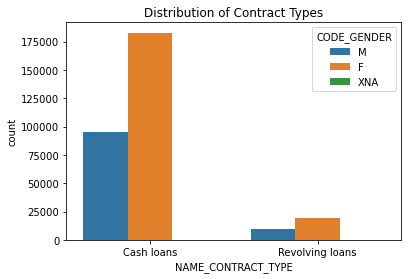

In [34]:
sns.countplot(data = app_train, x ='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER')
plt.title('Distribution of Contract Types')
plt.show()

It can be seen that in general people mostly go for Cash loans as compared to revolving loans and both type of contracts are dominated by females.

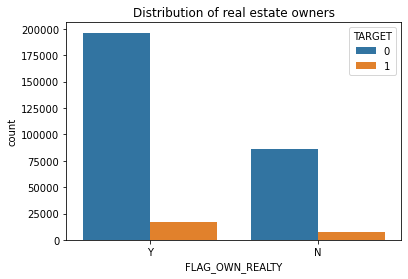

In [36]:
sns.countplot(data = app_train, x ='FLAG_OWN_REALTY', hue = 'TARGET')
plt.title('Distribution of real estate owners')
plt.show()

Generally people who own a realty are more likely to go for loans as compared to people who don't own one.

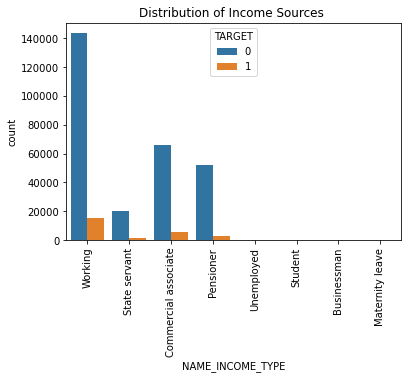

In [13]:
sns.countplot(data = app_train, x ='NAME_INCOME_TYPE', hue = 'TARGET')
plt.title('Distribution of Income Sources ')
plt.xticks(rotation = 90)
plt.show()

It can be observed that most of the defaulters belong to the working class followed by Commercial associates. A state servant is the least likely to fail repaying the loan amount

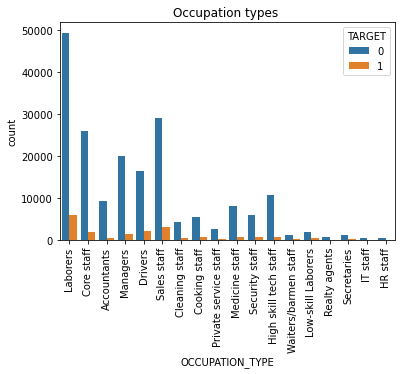

In [40]:
sns.countplot(data = app_train, x ='OCCUPATION_TYPE', hue = 'TARGET')
plt.title('Occupation types ')
plt.xticks(rotation = 90)
plt.show()

People who do not provide their occupation details and those who are labourers are more likely to fail paying back the loan.

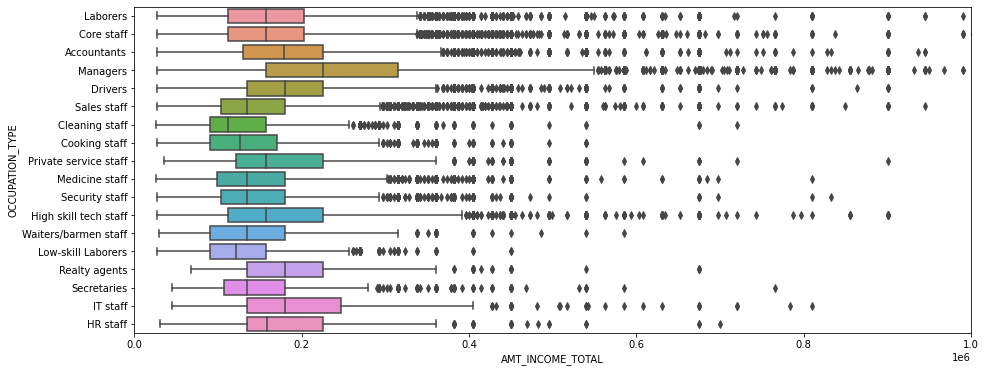

In [42]:
ig, ax = plt.subplots(figsize=(15, 6))
ax = sns.boxplot(y = "OCCUPATION_TYPE", x = "AMT_INCOME_TOTAL", orient = "h", data = app_train)
plt.xlim([0, 1e6])
plt.show()

# Processing Pipeline

In [64]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [71]:
def previous_app():
    df_pa = datasets['previous_application']
    #df_pa.drop('SK_ID_PREV', axis = 1, inplace = True)
    

    
    numcols = df_pa.select_dtypes(exclude= 'object').columns
    catcols = df_pa.select_dtypes(include= 'object').columns

    num = df_pa[numcols]
    cat = df_pa[catcols]
    
    num.index = num['SK_ID_CURR']
    cat.index = num['SK_ID_CURR']
    
    catind = cat.index


    num.drop('SK_ID_CURR', inplace= True, axis = 1)
    num = num.groupby('SK_ID_CURR').agg([np.sum, np.mean,max,min])  
    num.columns = num.columns.map('_'.join)
    mdl = StandardScaler().fit(num)
    num = pd.DataFrame(mdl.transform(num),index = num.index, columns = num.columns)


    cat = SimpleImputer(strategy='constant').fit_transform(cat)
    mdl = OneHotEncoder().fit(cat)

    cat = pd.DataFrame(mdl.transform(cat).toarray(), index = catind, columns = mdl.get_feature_names())
    cat = cat.groupby('SK_ID_CURR').agg(np.mean)
    final = num.merge(cat, how = 'left', on = 'SK_ID_CURR')
    return final

In [66]:
def load_train():
    df_train = app_train
   
    selected_features = ['SK_ID_CURR','AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
                    'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR',
                     'NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

   
    df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)    
    df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH']/-365

    
    X_train= df_train[selected_features]
    y_train = df_train['TARGET']


    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42, stratify  = y_train)

    X_val_ind = X_valid['SK_ID_CURR']



    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42,stratify  = y_train)

    X_train_ind = X_train['SK_ID_CURR']
    X_test_ind = X_test['SK_ID_CURR']


    X_valid.drop('SK_ID_CURR', inplace = True , axis = 1)
    X_train.drop('SK_ID_CURR', inplace = True , axis = 1)
    X_test.drop('SK_ID_CURR', inplace = True , axis = 1)
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test, X_train_ind, X_val_ind, X_test_ind

In [67]:
def transform_train(X_train, X_valid, X_test, X_train_ind, X_val_ind, X_test_ind):
    num_attribs = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
                   'EXT_SOURCE_2','EXT_SOURCE_3']

    cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']


    num_pipeline = Pipeline([
                            ('selector', DataFrameSelector(num_attribs)),
                            ('imputer', SimpleImputer(strategy='mean')),
                            ('std_scaler', StandardScaler()),
                           ])

    cat_pipeline = Pipeline([
                            ('selector', DataFrameSelector(cat_attribs)),
                            ('imputer', SimpleImputer(strategy='constant')),
                            ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
                            ])

    data_prep_pipeline = FeatureUnion(transformer_list=[
                                                        ("num_pipeline", num_pipeline),
                                                        ("cat_pipeline", cat_pipeline),
                                                       ])

    full_pipeline = Pipeline([("preparation", data_prep_pipeline)])

    X_train = pd.DataFrame(full_pipeline.fit_transform(X_train), index  = X_train_ind)
    X_valid = pd.DataFrame(full_pipeline.transform(X_valid), index = X_val_ind)
    X_test = pd.DataFrame(full_pipeline.transform(X_test), index= X_test_ind)
    
    return full_pipeline, X_train, X_valid, X_test

## Baseline Model

In [48]:
def BaselineApproach(fitted_models,expLog, X_train,X_valid, X_test,y_train,y_test,y_valid):
    models = [LogisticRegression(n_jobs = -1, solver = 'lbfgs')
          ,RandomForestClassifier(n_jobs = -1,n_estimators = 100)]
    
    models_name = ['Logistic','RandomForest']
    ctr = 0
    p_value = 0
    for model in models:
        cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)
        np.random.seed(42)
        model.fit(X_train, y_train)
        exp_name = f"Model_{models_name[ctr]}_features_{X_train.shape[1]}"
        fitted_models.append(model)
        if ctr   == 0:
            logit_scores = cross_val_score(model, X_train, y_train, cv=cv)
        else:
            best_train_scores = cross_val_score(model, X_train, y_train, cv=cv)
            (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)

        expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
                   [accuracy_score(y_train, model.predict(X_train)), 
                    accuracy_score(y_valid, model.predict(X_valid)),
                    accuracy_score(y_test, model.predict(X_test)),
                    roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                    roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                    roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),p_value],
                    4)) 
        ctr += 1
    return logit_scores

## Merge data from Previous Application file

In [62]:
def merge_df(X_train, X_valid, X_test, df_pv_app):
    X_train = X_train.merge(df_pv_app, how = 'left', on = 'SK_ID_CURR')
    X_valid = X_valid.merge(df_pv_app, how = 'left', on = 'SK_ID_CURR')
    X_test =  X_test.merge(df_pv_app, how = 'left', on = 'SK_ID_CURR')


    X_train.fillna(0, inplace = True)
    X_valid.fillna(0, inplace = True)
    X_test.fillna(0, inplace = True)
    
    return X_train, X_valid, X_test

## Baseline model with Previous Application

In [51]:
def BaselinPlusPvApp(logit_scores,fitted_models,expLog, X_train,X_valid, X_test,y_train,y_test,y_valid):
    models = [LogisticRegression(n_jobs = -1, solver = 'lbfgs' )
              ,RandomForestClassifier(n_jobs = -1,n_estimators = 100)]
    models_name = ['Logistic_Prev_app','RandomForest_prev_app']
    ctr = 0
    p_value = 0
    for model in models:
        cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)
        np.random.seed(42)
        model.fit(X_train, y_train)
        exp_name = f"Model_{models_name[ctr]}_features_{X_train.shape[1]}"
        fitted_models.append(model)
        best_train_scores = cross_val_score(model, X_train, y_train, cv=cv)
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)

        expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
                   [accuracy_score(y_train, model.predict(X_train)), 
                    accuracy_score(y_valid, model.predict(X_valid)),
                    accuracy_score(y_test, model.predict(X_test)),
                    roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                    roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                    roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),p_value],
                    4)) 
        ctr += 1

## Performance Metrics

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,P_Value
0,Model_Logistic_features_48,0.9191,0.9192,0.9196,0.7357,0.7407,0.7450,0.0000
1,Model_RandomForest_features_48,0.9999,0.9194,0.9194,1.0000,0.7100,0.7169,0.1024


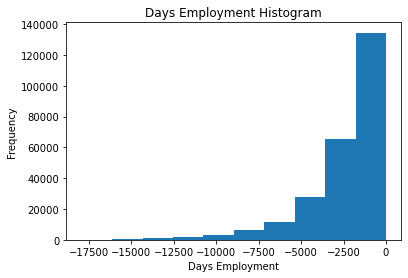

In [60]:
fitted_models = []
expLog = pd.DataFrame(columns=["exp_name", 
                               "Train Acc", 
                               "Valid Acc",
                               "Test  Acc",
                               "Train AUC", 
                               "Valid AUC",
                               "Test  AUC",
                               "P_Value"
                              ])

#Loading & Transforming Train
X_train, y_train, X_valid, y_valid, X_test, y_test, X_train_ind, X_val_ind, X_test_ind = load_train()

full_pipeline, X_train, X_valid, X_test = transform_train(X_train, X_valid, X_test, X_train_ind, X_val_ind, X_test_ind)

#BaselIne Model
logit_scores_baseline = BaselineApproach(fitted_models,expLog, X_train,X_valid, X_test,y_train,y_test,y_valid)
expLog

In [72]:
df_pv_app = previous_app()
X_train, X_valid, X_test = merge_df(X_train, X_valid, X_test, df_pv_app)
BaselinPlusPvApp(logit_scores_baseline,fitted_models,expLog, X_train,X_valid, X_test,y_train,y_test,y_valid)
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,P_Value
0,Model_Logistic_features_48,0.9191,0.9192,0.9196,0.7357,0.7407,0.7450,0.0000
1,Model_RandomForest_features_48,0.9999,0.9194,0.9194,1.0000,0.7100,0.7169,0.1024
2,Model_Logistic_Prev_app_features_269,0.9193,0.9194,0.9196,0.7567,0.7584,0.7601,0.0068
3,Model_RandomForest_prev_app_features_269,1.0000,0.9194,0.9195,1.0000,0.7168,0.7197,0.0000


In [70]:
datasets['previous_application'].describe()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Preparing Submission Data

In [80]:
def test_sub(full_pipeline,df_pv_app,fitted_models):
    df_test = app_test 
    
    tst_ind = df_test['SK_ID_CURR']
    test = pd.DataFrame(full_pipeline.transform(df_test), index = tst_ind)
    test = test.merge(df_pv_app, how = 'left', on = 'SK_ID_CURR')
    test.fillna(0,inplace = True)
    pred = fitted_models[3].predict_proba(test)[:,1]
    sub = pd.DataFrame(tst_ind)
    sub['TARGET'] = pred
    sub.to_csv('submission.csv', index = False)

In [82]:
test_sub(full_pipeline,df_pv_app,fitted_models)

## Kaggle Submission

In [83]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|█████████████████████████████████████████| 566k/566k [00:01<00:00, 488kB/s]
Successfully submitted to Home Credit Default Risk

# Write-up 


## Abstract
The course project is based on the Home Credit Default Risk (HCDR) Kaggle Competition. Our goal is to create a machine learning model that is well optimized and performs efficiently to asses this risk for lender. There are many factors in a person’s life that lenders can use to assess this risk such as previous credit history, occupation, age, location, credit card usage, and others. We will be studying these factors when trying to assess a loan application and provides them with the decision-making guidance they need for a sustainable business operation.

Entire project will be implemented in 3 phases. In Phase 1, We experimented with  classification algorithms like Logistic regression and Random Forest as our baseline models with features from 3 out of the 8 available datasets. We have conducted 4 experiments in total in this phase using the above mentioned models and we will walk you through the results in coming sections of this presentation.We hope to produce a model that will allow Home Credit to successfully predict the likelihood of repayment so that more people can have access to much needed loans.

## Project Description

## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

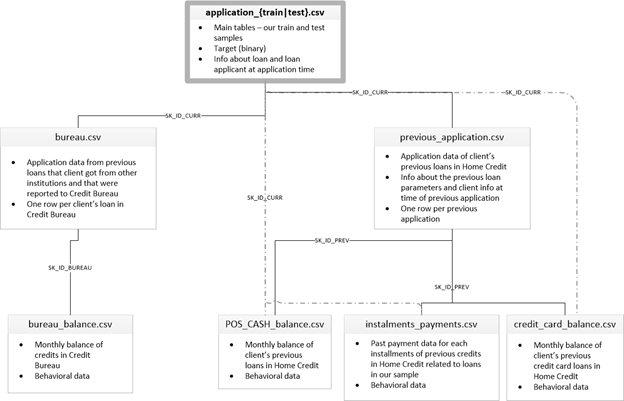

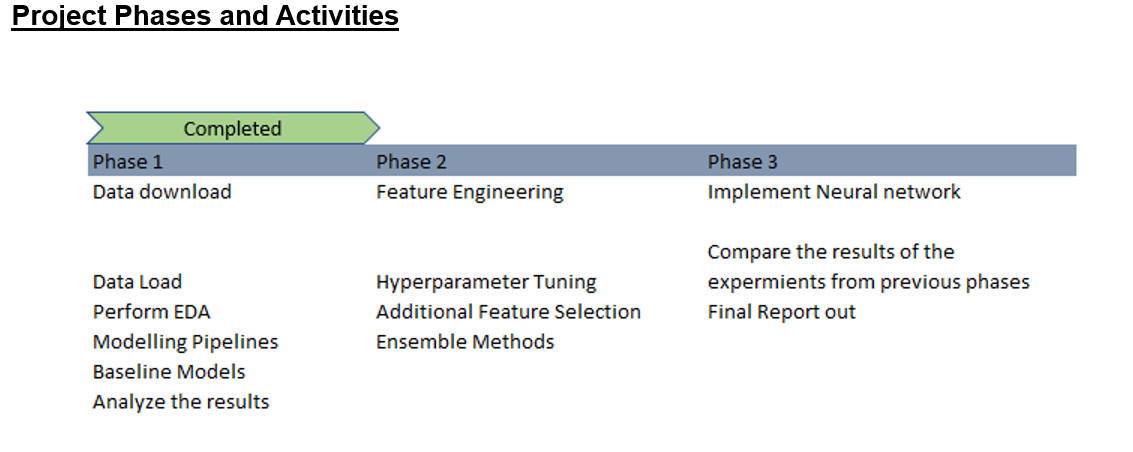
## Feature Engineering and transformers

Feature engineering is a process that can include both feature creation (adding new features to existing data) and feature selection (identifying only the most significant features or using other dimensionality reduction techniques). We may utilize a variety of ways to both build and pick features.
Applied group_by and grouped the data, taking SK_ID_CURR as a key, and aggregated using aggerate functions and using some features from the previous_application data set.

We have performed correlation analysis in section 4.4 and picked up the highly correlated features for the experiments in this phase.

We have used the following Features

Selected features = ['SK_ID_CURR','AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
                    'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR',
                     'NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

num_attribs = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
                   'EXT_SOURCE_2','EXT_SOURCE_3']

cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

## Pipelines

Build Numeric Pipeline

    Identify the numeric features we wish to consider.

    Create a pipeline for the numeric features.

    Use DataFrameSelector() to select the desired numeric features

    Use SimpleImputer() for missing data: there are quite a few missing values in the dataset. Missing values will be imputed using the feature mean.

    Use StandardScaler() to standardize the data

The numeric pipeline will look like as follows:

    num_pipeline =Pipeline([
     ('selector', DataFrameSelector(num_attribs)),
     ('imputer', SimpleImputer(strategy="median")),
     ('std_scaler', StandardScaler()),
     ])
 
Build Categorical Pipeline:

    Identify the categorical features we wish to consider.

    Identify the range of expected values for the categorical features.

    Create a pipeline for the categorical features.

    Use SimpleImputer() for missing data: there are quite a few missing values in the dataset. Missing values will be imputed using constant values.

Then use One Hot Encoding

The numeric pipeline will look like as follows:

    cat_pipeline = Pipeline([
     ('selector', DataFrameSelector(cat_attribs)),
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
     ])
 
Union numeric pipeline and categorical pipeline:


The codes will looks like as follows:

    data_prep_pipeline= FeatureUnion(transformer_list=[
     ("num_pipeline", num_pipeline),
     ("cat_pipeline", cat_pipeline),
     ])
 
full_pipeline = Pipeline([("preparation", data_prep_pipeline)])
 
## Experimental results
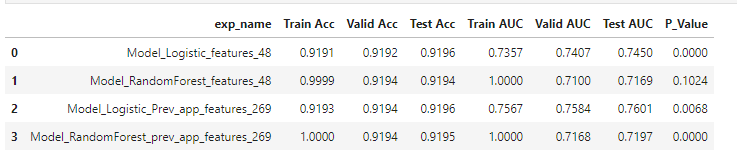

Initially, we got the test AUC of 0.74 and 0.71 with Logistic Regression and Random Forest, respectively, and after merging with the previous application_data we could see a small increase in AUC in the Logistic Regression, but it had no effect in the Random Forest Model.

## Discussion

We have conducted 4 different experiments in this Phase using Logistic regression and Random Forrest algorithms. We have first conducted the experiment with teh data only from Application Train and Application Test data set with out including supporting datasets. We have observed that we got 74% AUC with logistic regression and 71% with Random forrest. We have then added additional features from Previous application data and observed that AUC for logist regression increased to 76% and haven't seen any improvement with Random forrest.
## Conclusion

By adding features from previous application data set , we have seen that accuracy improved from 74% to 76% for our baseline Logistic regression model. We haven’t seen the improvement with the Random forest model. This shows the importance of doing EDA on other supporting datasets to find out the right features and use that in our models.

We followed a machine learning project's general outline:

    •Recognize the issue and the data.
    •Cleaning and formatting of data (this was mostly done for us)
    •Examine exploratory data
    •Model to start with:  Baseline model
    •Improved model
    •Interpretation of the model (just a little)



Our focus in the coming phases will be on 
              
    Exploring new features

    Hyperparameter tuning

    Implement/explore other models like Gradient Boost and AdaBoost

## Kaggle Submission
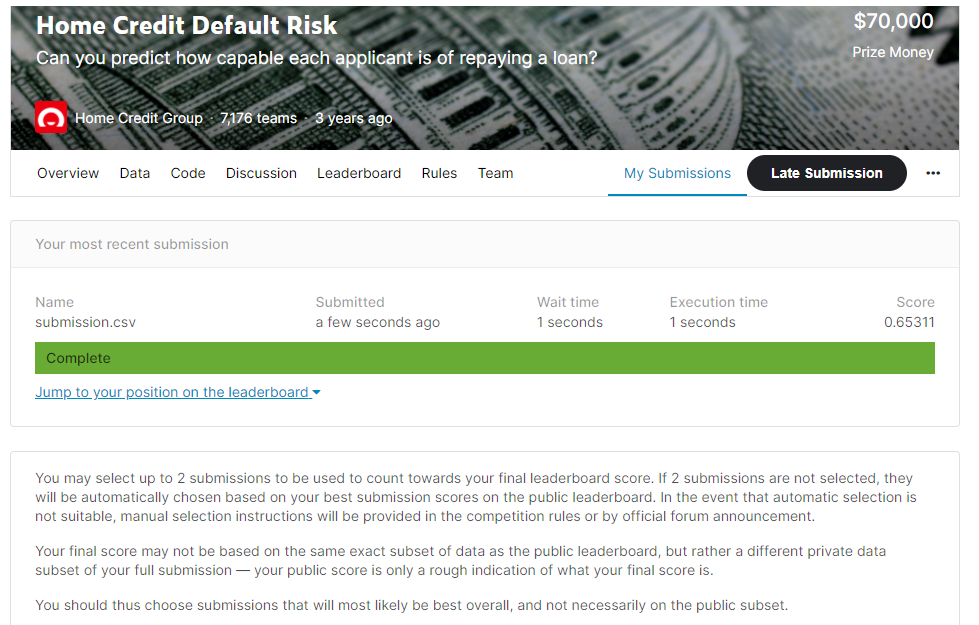